In [1]:
# Importing Libraries

import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model analysis and building libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Sourcing

In [2]:
df = pd.read_csv("train.csv")  # Reading CSV file

In [3]:
df.head()  # Fetching first 5 rows from dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Understanding the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking for features datatype 

df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

## Data Cleaning

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.shape

(1460, 81)

## Helper Functions for Preprocessing and EDA

In [8]:
# Function to generate Bar Plots

def bar(title, x, size):
  plt.figure(figsize=size)
  ax = sns.countplot(x=x)
  plt.title(title, fontsize=16)
  plt.show()

### Data Preprocessing

### Target Feature

C:\Users\Shah Kevin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


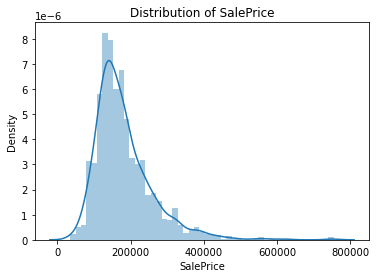

In [9]:
ax = sns.distplot(df["SalePrice"])
ax.set_xlabel("SalePrice")
ax.set_title('Distribution of SalePrice')
plt.show()

Target Variable is normally distributed and there are few outliers which will normalised by scaling during model building

In [10]:
df = df.drop(['Id'],axis=1)   # Drop unnecessary Id column

In [11]:
# MSSubClass Feature Distribution 

df['MSSubClass'].value_counts()*100/len(df)

20     36.712329
60     20.479452
50      9.863014
120     5.958904
30      4.726027
160     4.315068
70      4.109589
80      3.972603
90      3.561644
190     2.054795
85      1.369863
75      1.095890
45      0.821918
180     0.684932
40      0.273973
Name: MSSubClass, dtype: float64

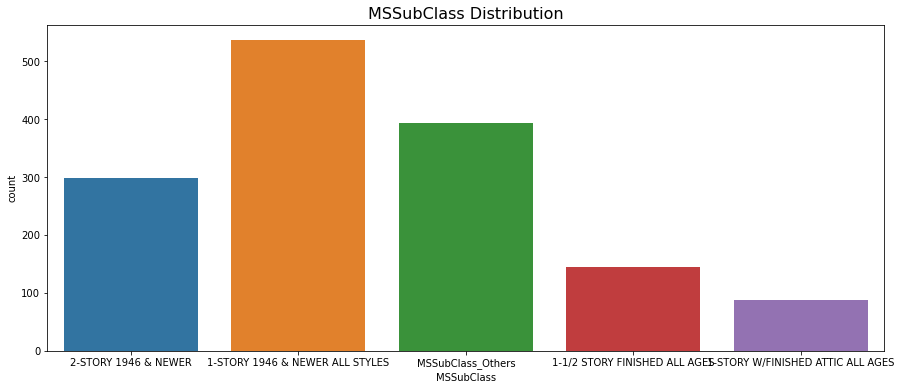

In [12]:
# We can group all labels having the percentage less than 5% into single group as OTHERS

MSSubClassDict = {'MSSubClass': {
    20:	'1-STORY 1946 & NEWER ALL STYLES',
    60:	'2-STORY 1946 & NEWER',
    50:	'1-1/2 STORY FINISHED ALL AGES',
    120: '1-STORY W/FINISHED ATTIC ALL AGES',
    30: 'MSSubClass_Others',
    40: 'MSSubClass_Others',
    45: 'MSSubClass_Others',
    70: 'MSSubClass_Others',
    75: 'MSSubClass_Others',
    80: 'MSSubClass_Others',
    85: 'MSSubClass_Others',
    90: 'MSSubClass_Others',
    150: 'MSSubClass_Others',
    160: 'MSSubClass_Others',
    180: 'MSSubClass_Others',
    190: 'MSSubClass_Others'
}} 

df['MSSubClass'] = df.replace(MSSubClassDict)['MSSubClass']

# Visualization
bar('MSSubClass Distribution', df['MSSubClass'], (15,6))

In [13]:
# MSZoning Feature Distribution 

df['MSZoning'].value_counts()*100/len(df)

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64

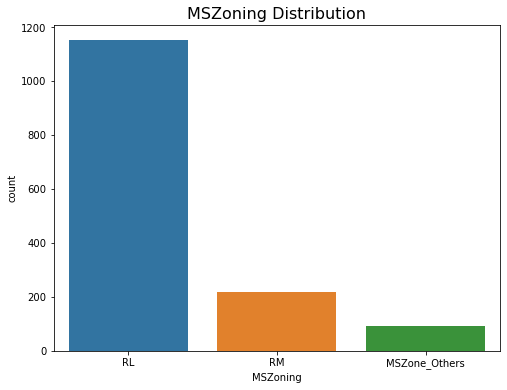

In [14]:
# We can group all labels having the percentage less than 10 % into single group as OTHERS

MSZone = {'MSZoning': {
    'FV':'MSZone_Others',
    'RH':'MSZone_Others',
    'C (all)':'MSZone_Others'
}} 

df['MSZoning'] = df.replace(MSZone)['MSZoning']

# Visualization
bar('MSZoning Distribution', df['MSZoning'], (8,6))

In [15]:
# Street can be dropped as data is fully biased with 99.5% of Pave
print(df['Street'].value_counts()*100/len(df), '\n')

df['Street'].value_counts()

Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64 



Pave    1454
Grvl       6
Name: Street, dtype: int64

In [16]:
# Alley can be dropped as there are NUll values more than 94%
print('Null Value Percentage:' ,df['Alley'].isna().sum()*100/len(df), '\n')

df['Alley'].value_counts()

Null Value Percentage: 93.76712328767124 



Grvl    50
Pave    41
Name: Alley, dtype: int64

In [17]:
# Utilities can be dropped as data is fully biased with 99.9% of AllPub
print(df['Utilities'].value_counts()*100/len(df), '\n')

df['Utilities'].value_counts()

AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64 



AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [18]:
# Dropping Alley, Street, Utilities
df = df.drop(['Utilities','Alley','Street'], axis=1)

In [19]:
# LotFrontage can be derived through Lot Area (LotFrontage = LotArea/LotWidth)

# Missing Values in Lot Frontage
df['LotFrontage'].isna().sum()

259

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


C:\Users\Shah Kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


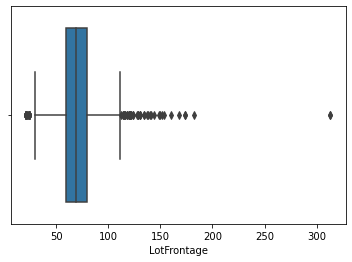

In [20]:
print(df['LotFrontage'].describe())
ax = sns.boxplot(df['LotFrontage'])
plt.show()

Imputing 259 null values with median as there are outliners

In [21]:
# Imputing Null values with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [22]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

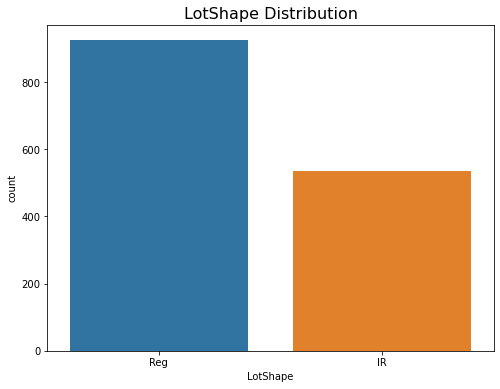

In [23]:
# We can group Lot shape into 2 labels Reg and IR

Lot = {'LotShape': {
    'IR1':'IR',
    'IR2':'IR',
    'IR3':'IR'
}} 

df['LotShape'] = df.replace(Lot)['LotShape']


# Visualization
bar('LotShape Distribution', df['LotShape'], (8,6))

In [24]:
# Lot Config
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

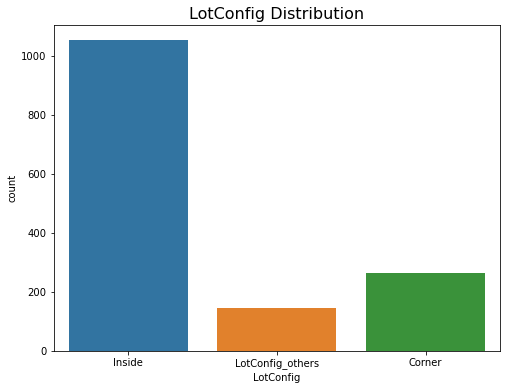

In [25]:
# We can group Lot shape into 3 labels Merging (Inside, Corner, Others)

Lot = {'LotConfig': {
    'CulDSac':'LotConfig_others',
    'FR2':'LotConfig_others',
    'FR3':'LotConfig_others'
}} 

df['LotConfig'] = df.replace(Lot)['LotConfig']

# Visualization
bar('LotConfig Distribution', df['LotConfig'], (8,6))

In [26]:
# LandContour

df['LandContour'].value_counts() 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [27]:
# We can group Landcontour into 2 labels Merging (Lvl,  Others)

Land = {'LandContour': {
    'Bnk':'Landcont_others',
    'HLS':'Landcont_others',
    'Low':'Landcont_others'
}} 

df['LandContour'] = df.replace(Land)['LandContour']

In [28]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [29]:
df = df.drop(['LandSlope'],axis=1)

In [30]:
df['Neighborhood'].value_counts()*100/len(df)

NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
ClearCr     1.917808
StoneBr     1.712329
SWISU       1.712329
MeadowV     1.164384
Blmngtn     1.164384
BrDale      1.095890
Veenker     0.753425
NPkVill     0.616438
Blueste     0.136986
Name: Neighborhood, dtype: float64

Each value of Neighborhood has different significance,looks like a good variable

In [31]:
# Condition1 and Condition2 can be conidered as a single entity by its defination

df[['Condition1','Condition2']].value_counts()

Condition1  Condition2
Norm        Norm          1260
Feedr       Norm            76
Artery      Norm            45
RRAn        Norm            22
PosN        Norm            17
RRAe        Norm            11
PosA        Norm             8
RRAn        Feedr            4
RRNn        Norm             4
Feedr       RRNn             2
PosN        PosN             2
RRNe        Norm             2
Artery      Artery           2
Feedr       RRAn             1
            RRAe             1
            Feedr            1
Artery      PosA             1
RRNn        Feedr            1
dtype: int64

In [32]:
# Almost every row has Norm Condition to proximities ,so both columns can be ignored

df=df.drop(['Condition1','Condition2'],axis=1)

In [33]:
# HouseStyle

df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

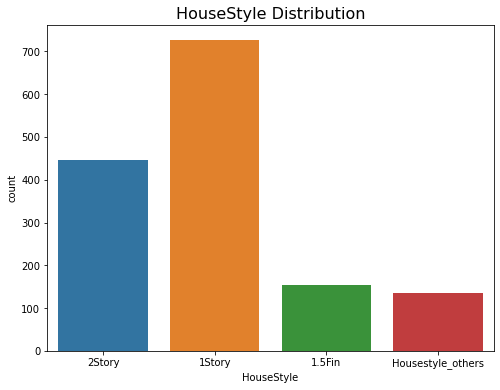

In [34]:
# We can group HouseStyle into 4 labels  (1Story,  2Story, 1.5Story, Others)

House = {'HouseStyle': {
    'SLvl':	'Housestyle_others',
    'SFoyer':'Housestyle_others',
    '1.5Unf':'Housestyle_others',
    '2.5Unf':'Housestyle_others',
    '2.5Fin':'Housestyle_others'
}} 

df['HouseStyle'] = df.replace(House)['HouseStyle']


# Visualization
bar('HouseStyle Distribution', df['HouseStyle'], (8,6))

In [35]:
# Building Type

df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

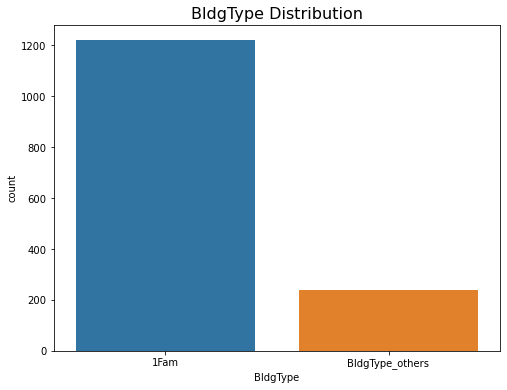

In [36]:
# We can group Building type into 2 labels (1Fam, Others)

House = {'BldgType': {
    'TwnhsE':'BldgType_others',
    'Duplex':'BldgType_others',
    'Twnhs':'BldgType_others',
    '2fmCon':'BldgType_others'
}} 

df['BldgType'] = df.replace(House)['BldgType']


# Visualization
bar('BldgType Distribution', df['BldgType'], (8,6))

C:\Users\Shah Kevin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


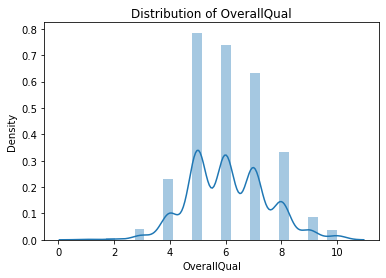

In [37]:
ax = sns.distplot(df["OverallQual"])
ax.set_xlabel("OverallQual")
ax.set_title('Distribution of OverallQual')
plt.show()

C:\Users\Shah Kevin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


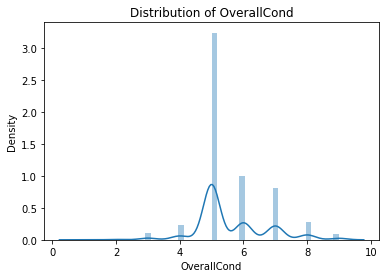

In [38]:
ax = sns.distplot(df["OverallCond"])
ax.set_xlabel("OverallCond")
ax.set_title('Distribution of OverallCond')
plt.show()

In [39]:
df['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

In [40]:
df['YearRemodAdd'].value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In Year built and Year remodelled we can consider only Year remodelled as both are same entities

We will drop year built

In [41]:
df = df.drop(['YearBuilt'],axis=1)

In [42]:
# Will consider the age of house since last remodelled and last sold
df['YearRemodAdd'] = df['YrSold'] - df['YearRemodAdd']

# YearRemodAdd can be remain same as continous value (Ordinal Categories)

# YrSold can be dropped
df = df.drop('YrSold', axis=1)

In [43]:
# RoofStyle

df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

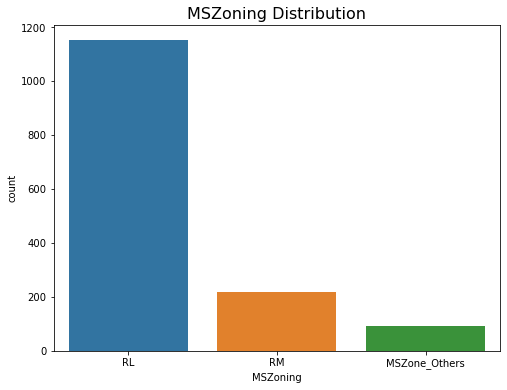

In [44]:
# We can group RoofStyle into 3 labels  (Gaple, Hip, Others)

House = {'RoofStyle': {
    'Flat':	'RoofStyle_others',
    'Gambrel':	'RoofStyle_others',
    'Mansard':	'RoofStyle_others',
    'Shed':	'RoofStyle_others'
}} 

df['RoofStyle'] = df.replace(House)['RoofStyle']

# Visualization
bar('MSZoning Distribution', df['MSZoning'], (8,6))

In [45]:
# Roof Material

df['RoofMatl'].value_counts()*100/len(df)

CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
Metal       0.068493
Membran     0.068493
Roll        0.068493
ClyTile     0.068493
Name: RoofMatl, dtype: float64

In [46]:
# RoofMatl can be dropped as 98% values are from CopmShg

df = df.drop(['RoofMatl'],axis=1)

In [47]:
# Exterior1st and Exterior2nd can be conidered as a single entity by its defination

df[['Exterior1st','Exterior2nd']].value_counts()

Exterior1st  Exterior2nd
VinylSd      VinylSd        502
MetalSd      MetalSd        212
HdBoard      HdBoard        193
Wd Sdng      Wd Sdng        177
Plywood      Plywood         96
                           ... 
VinylSd      AsbShng          1
             HdBoard          1
             ImStucc          1
ImStucc      ImStucc          1
Stucco       Stone            1
Length: 67, dtype: int64

In [48]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [49]:
# Exteriorist2nd can be dropped
df = df.drop(['Exterior2nd'],axis=1)

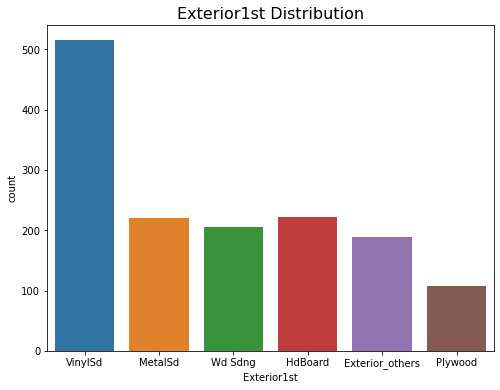

In [50]:
House = {'Exterior1st': {
    'CemntBd':'Exterior_others',
    'BrkFace':'Exterior_others',
    'Stucco':'Exterior_others',
    'WdShing':'Exterior_others',
    'AsbShng':'Exterior_others',
    'BrkComm':'Exterior_others',
    'Stone':'Exterior_others',
    'ImStucc':'Exterior_others',
    'CBlock':'Exterior_others',
    'AsphShn':'Exterior_others'
}} 

df['Exterior1st'] = df.replace(House)['Exterior1st']


# Visualization
bar('Exterior1st Distribution', df['Exterior1st'], (8,6))

In [51]:
# Null values treated with None
print(df['MasVnrType'].isna().sum())

df['MasVnrType'] = df['MasVnrType'].fillna('None')

8


In [52]:
# MasVnrType
df['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [53]:
# We can group MasVnrType into 3 labels

House = {'MasVnrType': {
    'BrkCmn':  'Stone'
}} 

df['MasVnrType'] = df.replace(House)['MasVnrType']

In [54]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

C:\Users\Shah Kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


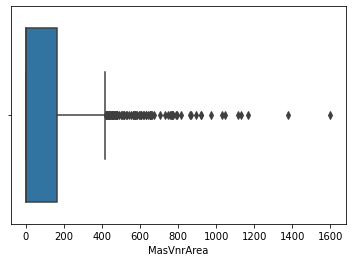

In [55]:
ax = sns.boxplot(df['MasVnrArea'])

Outliers are there so imputing null values with Median

In [56]:
# Null values treated with Median vales
print(df['MasVnrArea'].isna().sum())

df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

8


In [57]:
# ExterQual
df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [58]:
# ExterCond
df['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

Exterior Condition and Quality have most of the ratings as Typical and Good.

This Feature wont be significant and can be dropped

In [59]:
df = df.drop(['ExterQual','ExterCond'],axis=1)

In [60]:
# Foundation 

df['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [61]:
# We can group Foundation into 3 labels

House = {'Foundation': {
    'BrkTil':'Foundation_Others',
    'Slab':'Foundation_Others',
    'Stone':'Foundation_Others',
    'Wood':'Foundation_Others'
}} 

df['Foundation'] = df.replace(House)['Foundation']

In [62]:
# Bsmnt Condition: Most of the values are typical and good so this feature can be ignored

df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [63]:
df = df.drop(['BsmtCond'],axis=1)

In [64]:
# Bsmnt Condition: Most of the values are typical and good so this feature can be ignored

df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [65]:
df = df.drop(['BsmtQual'],axis=1)

In [66]:
# BsmtExposure will divide into two clases yes/no

df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [67]:
# Imputing null values with No since NA indicates NO basement here
# NO basement = No Basement Exposure

df['BsmtExposure'] = df['BsmtExposure'].fillna('No')

In [68]:
House = {'BsmtExposure': {
    'Av':'Yes',
    'Gd':'Yes',
    'Mn':'Yes'
}} 

df['BsmtExposure'] = df.replace(House)['BsmtExposure']

In [69]:
# BaseFinType1

df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [70]:
# Imputing null values with mode

df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')

In [71]:
# We can convert labels into nominal increasing labels

House = {'BsmtFinType1': {
    'Unf':0,
    'No Basement':0,
    'LwQ':1,
    'Rec':2,
    'BLQ':3,
    'ALQ':4,
    'GLQ':5,
}} 

df['BsmtFinType1'] = df.replace(House)['BsmtFinType1']

In [72]:
# BsmtFinype2 is an extension for BsmtFinType1 and can be dropped because most of them are unfininshed

df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [73]:
# Dropping BsmtFinType2
df = df.drop(['BsmtFinType2'],axis=1)

In [74]:
# TotalBsmtSf = BsmtFinSF1 + BsmtFinSF2
# Hence both BsmtFinSF1 and BsmtFinSF2 can be dropped

df = df.drop(['BsmtFinSF1', 'BsmtFinSF2'],axis=1)

In [75]:
# Both FinishedBsmt and  UnfinishedBsmt can be made as a single feature
# As anyone can finish basement in unfinished area after purchasing
# Hence we can drop BsmtUnfSF

df = df.drop(['BsmtUnfSF'],axis=1)

In [76]:
# Heating 

df['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [77]:
# Heating can be dropped beacuse most of the values are from GasA
df = df.drop(['Heating'],axis=1)

In [78]:
df['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [79]:
# Most of the values in HeatingQC are good so the column can be dropped
df = df.drop(['HeatingQC'],axis=1)

In [80]:
df['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [81]:
# Most of the values in Central Air are good so the column can be dropped
df = df.drop(['CentralAir'],axis=1)

In [82]:
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [83]:
# Most of the values in Electrical are good so the column can be dropped
df = df.drop(['Electrical'],axis=1)

In [84]:
df['LowQualFinSF'].value_counts()*100/len(df)

0      98.219178
80      0.205479
360     0.136986
205     0.068493
479     0.068493
397     0.068493
514     0.068493
120     0.068493
481     0.068493
232     0.068493
53      0.068493
515     0.068493
156     0.068493
473     0.068493
420     0.068493
390     0.068493
371     0.068493
392     0.068493
144     0.068493
572     0.068493
528     0.068493
234     0.068493
513     0.068493
384     0.068493
Name: LowQualFinSF, dtype: float64

In [85]:
# Most of the houses dont have low quality finished , so this feature can be dropped

df = df.drop(['LowQualFinSF'],axis=1)

In [86]:
# BsmtFullbath this can be either yes or No as most 

df['BsmtFullBath'].value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

In [87]:
# We can convert labels into nominal increasing labels

House = {'BsmtFullBath': {
    2:1,
    3:1,
}} 

df['BsmtFullBath'] = df.replace(House)['BsmtFullBath']

In [88]:
# Halfbath this can be either yes or No as most 

df['HalfBath'].value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

In [89]:
# We can convert labels into nominal increasing labels

House = {'HalfBath': {
    2:1,
    3:1,
}} 

df['HalfBath'] = df.replace(House)['HalfBath']


In [90]:
print(df['BsmtHalfBath'].value_counts())

#Most of the houses sont have basement half bathroom so the column can be ignored
df = df.drop(['BsmtHalfBath'],axis=1)

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64


In [91]:
df['GrLivArea'].value_counts() 

864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64

In [92]:
# KitchenQual
print(df['KitchenQual'].value_counts())

# Most of the Quality values are typical and Good so
# Kitchen quality can be ignored

df = df.drop(['KitchenQual'],axis=1)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64


In [93]:
# KitchenAbvGr
print(df['KitchenAbvGr'].value_counts())

# Most of the Quality values are 1 kitchen so,
#  KitchenAbvGr can be ignored

df = df.drop(['KitchenAbvGr'],axis=1)

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


In [94]:
# Functional
print(df['Functional'].value_counts())

# Most of the Functional values are Typical,
#  Functional can be ignored

df = df.drop(['Functional'],axis=1)

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


In [95]:
# FireplaceQu
print(df['FireplaceQu'].value_counts())
print('\n Null values: ', df['FireplaceQu'].isna().sum())
# Most of the FireplaceQu values are Typical and Good also many Null calues,
# FireplaceQu can be ignored

df = df.drop(['FireplaceQu'],axis=1)

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

 Null values:  690


In [96]:
# GarageQual

print('\n Null values: ', df['GarageQual'].isna().sum())

# NA in datset refers to no garage
df['GarageQual'] = df['GarageQual'].fillna('No')

print(df['GarageQual'].value_counts())

# Most of the GarageQual values are Typical and Good also many Null calues,
# GarageQual can be ignored

df = df.drop(['GarageQual'],axis=1)


 Null values:  81
TA    1311
No      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


In [97]:
# GarageCond
print('\n Null values: ', df['GarageCond'].isna().sum())

# NA in datset refers to no garage
df['GarageCond'] = df['GarageCond'].fillna('No')

print(df['GarageCond'].value_counts())

# Most of the GarageCond values are Typical and Good also many Null calues,
# GarageCond can be ignored

df = df.drop(['GarageCond'],axis=1)


 Null values:  81
TA    1326
No      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [98]:
# Garage Year Built can be ignored as its not important in business aspect
df = df.drop(['GarageYrBlt'],axis=1)

In [99]:
# GarageType

df['GarageType'] = df['GarageType'].fillna('No Garage')

In [100]:
# We can convert labels into two groups (Attached, Not Attached)

House = {'GarageType': {
    'Attchd': 1,
    'Detchd': 0,
    'BuiltIn': 0,
    'Basment': 0,
    'CarPort': 0,
    '2Types': 0,
    'No Garage': 0
}} 

df['GarageType'] = df.replace(House)['GarageType']

In [101]:
# Garage Cars is more significant than Garage Area, it tells occupancy of cars
# GarageArea can be dropped

df = df.drop(['GarageArea'],axis=1)

In [102]:
df['GarageFinish'].value_counts()

df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')

In [103]:
# We can convert labels into two groups (Attached, Not Attached)

House = {'GarageFinish': {
    'Unf': 0,
    'RFn': 1,
    'No Garage': 1,
    'Fin': 1
}} 

df['GarageFinish'] = df.replace(House)['GarageFinish']

In [104]:
# PavedDrive
print('\nNull values: ', df['PavedDrive'].isna().sum())

print(df['PavedDrive'].value_counts())

# Most of the GarageCond values are Typical and Good also many Null calues,
# GarageCond can be ignored

df = df.drop(['PavedDrive'],axis=1)


Null values:  0
Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64


In [105]:
# 3SsnPorch
print('\nNull values: ', df['3SsnPorch'].isna().sum())

print(df['3SsnPorch'].value_counts())

# Most of the 3SsnPorch values are 0 means most wont have it
# 3SsnPorch can be ignored

df = df.drop(['3SsnPorch'],axis=1)


Null values:  0
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64


In [106]:
# ScreenPorch
print('\nNull values: ', df['ScreenPorch'].isna().sum())

print(df['ScreenPorch'].value_counts())

# Most of the ScreenPorch values are 0 means most wont have it
# ScreenPorch can be ignored

df = df.drop(['ScreenPorch'],axis=1)


Null values:  0
0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64


In [107]:
# PoolQC
print('\nNull values: ', df['PoolQC'].isna().sum())

print(df['PoolQC'].value_counts())

# Most of the PoolQC values are null values
# PoolQC can be ignored

df = df.drop(['PoolQC'],axis=1)


Null values:  1453
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


In [108]:
# Fence
print('\nNull values: ', df['Fence'].isna().sum())

print(df['Fence'].value_counts())

# Most of the Fence values are null values
# Fence can be ignored

df = df.drop(['Fence'],axis=1)


Null values:  1179
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


In [109]:
# MiscFeature
print('\nNull values: ', df['MiscFeature'].isna().sum())

print(df['MiscFeature'].value_counts())

# Most of the MiscFeature values are null values
# MiscFeature can be ignored

df = df.drop(['MiscFeature'],axis=1)

# MiscValues
# we should sropMiscValues as MiscFeatures are dropped
df = df.drop(['MiscVal'],axis=1)


Null values:  1406
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64


In [110]:
# MoSold

House = {'MoSold': {
    1 : 'Jan',
    2 :	'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}} 

df['MoSold'] = df.replace(House)['MoSold']

df['MoSold'].value_counts()

Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64

In [111]:
#Saletype

print(df['SaleType'].value_counts())

House = {'SaleType': {
    'COD' : 'Sales_others',
    'ConLD' :'Sales_others',
    'ConLw' : 'Sales_others',
    'ConLI' : 'Sales_others',
    'CWD' : 'Sales_others',
    'Oth' : 'Sales_others',
    'Con' : 'Sales_others'
}} 

#df['SaleType'] = df.replace(House)['SaleType']

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


In [112]:
# SaleCondition

print(df['SaleCondition'].value_counts())


House = {'SaleCondition': {
    'Family' : 'SalesCon_others',
    'Alloca' : 'SalesCon_others',
    'AdjLand' : 'SalesCon_others'
}} 

df['SaleCondition'] = df.replace(House)['SaleCondition']

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


In [113]:
df.shape

(1460, 41)

In [114]:
df.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,SaleType,SaleCondition,SalePrice
count,1460,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460.000000
unique,5,3,NaN,NaN,2,2,3,25,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,12,9,4,NaN
top,1-STORY 1946 & NEWER ALL STYLES,RL,NaN,NaN,Reg,Lvl,Inside,NAmes,1Fam,1Story,...,NaN,NaN,NaN,NaN,NaN,NaN,Jun,WD,Normal,NaN
freq,536,1151,NaN,NaN,925,1311,1052,225,1220,726,...,NaN,NaN,NaN,NaN,NaN,NaN,253,1267,1198,NaN
mean,NaN,NaN,69.863699,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,0.585616,1.767123,94.244521,46.660274,21.954110,2.758904,NaN,NaN,NaN,180921.195890
std,NaN,NaN,22.027677,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,0.492784,0.747315,125.338794,66.256028,61.119149,40.177307,NaN,NaN,NaN,79442.502883
min,NaN,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,34900.000000
25%,NaN,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,129975.000000
50%,NaN,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,2.000000,0.000000,25.000000,0.000000,0.000000,NaN,NaN,NaN,163000.000000
75%,NaN,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,2.000000,168.000000,68.000000,0.000000,0.000000,NaN,NaN,NaN,214000.000000


In [115]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'PoolArea', 'MoSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

## Model Building
Categorical variables are dummy encoded by dropping the first column to avoid collinearlity among them

In [118]:
clean_df = df.copy()

In [119]:
# dummy values are encoded for nominal values

all_categorical_features = list(clean_df.select_dtypes(include=['object']).columns)

dummy_encoding = pd.get_dummies(clean_df[all_categorical_features], drop_first=True)

# Concatinating with existing datafraem
df_cleaned = pd.concat([clean_df_new, dummy_encoding], axis=1)

# Drop parent category column which are encoded 
df_cleaned = df_cleaned.drop(all_categorical_features , axis=1)

In [120]:
df_cleaned

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinType1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_SalesCon_others
0,65.0,8450,7,5,5,196.0,5,856,856,854,...,0,0,0,0,0,0,1,1,0,0
1,80.0,9600,6,8,31,0.0,4,1262,1262,0,...,0,0,0,0,0,0,1,1,0,0
2,68.0,11250,7,5,6,162.0,5,920,920,866,...,0,0,0,0,0,0,1,1,0,0
3,60.0,9550,7,5,36,0.0,4,756,961,756,...,0,0,0,0,0,0,1,0,0,0
4,84.0,14260,8,5,8,350.0,5,1145,1145,1053,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,7,0.0,0,953,953,694,...,0,0,0,0,0,0,1,1,0,0
1456,85.0,13175,6,6,22,119.0,4,1542,2073,0,...,0,0,0,0,0,0,1,1,0,0
1457,66.0,9042,7,9,4,0.0,5,1152,1188,1152,...,0,0,0,0,0,0,1,1,0,0
1458,68.0,9717,5,6,14,0.0,5,1078,1078,0,...,0,0,0,0,0,0,1,1,0,0


## Train Test Split

The overall dataset size has around 1460 records. Comparitively its a small dataset so we will try to split data into 70:30 ratio.

In [121]:
np.random.seed(0)

X_train, X_test = train_test_split(df_cleaned, test_size=0.3,  random_state=40)

## Normalizing Features
We are going to use MinMax Scaler to normalize the features

Normalizing helps to reach minima easily

In [122]:
all_numerical_features = list(clean_df.select_dtypes(include=['float64','int64']).columns)

# Scaling high valued features to range of [0,1] using MinMax Scaler
scaler = MinMaxScaler()
X_train[all_numerical_features] = scaler.fit_transform(X_train[all_numerical_features])

# Scaling for Test Data
scaler = MinMaxScaler()
X_test[all_numerical_features] = scaler.fit_transform(X_test[all_numerical_features])

In [123]:
# SalePrice is a target variable

y_train = X_train.pop('SalePrice')
y_test = X_test.pop('SalePrice')

## RFE for Variable Selection

In [124]:
X_train.shape

(1022, 96)

We have 96 features for model building.

We will reduce the features to 30 using RFE

In [153]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [154]:
# Selecting 30 features through RFE 
features = RFE(regressor,n_features_to_select=30)

In [155]:
rfe = features.fit(X_train, y_train)

In [156]:
rfe_list = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
rfe_list 

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', False, 43),
 ('MasVnrArea', False, 6),
 ('BsmtFinType1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 33),
 ('FullBath', False, 20),
 ('HalfBath', False, 26),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 3),
 ('GarageType', False, 61),
 ('GarageFinish', False, 15),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 21),
 ('EnclosedPorch', False, 59),
 ('PoolArea', False, 7),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 16),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', True, 1),
 ('MSSubClass_2-STORY 1946 & NEWER', False, 17),
 ('MSSubClass_MSSubClass_Others', True, 1),
 ('MSZoning_RL', False, 54),
 ('MSZoning_RM', False, 11),
 ('LotShape_Reg', False, 66),
 ('LandContour_Lvl', False, 13),
 ('LotConfig_Insi

In [157]:
# list of only top 30 featuers 
rfe_selected = [r[0] for r in rfe_list if r[1] == True]

In [158]:
rfe_selected

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtFinType1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageCars',
 'WoodDeckSF',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_MSSubClass_Others',
 'Neighborhood_Crawfor',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'HouseStyle_1Story',
 'HouseStyle_Housestyle_others',
 'BsmtExposure_Yes',
 'SaleType_Con',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleCondition_Partial']

## Normal Linear Regression Model for selected 30 Features

In [159]:
lm = LinearRegression()

lm.fit(X_train[rfe_selected], y_train)

LinearRegression()

In [161]:
# Metric Evaluation

y_pred_train = lm.predict(X_train[rfe_selected])
r2_train_lr = r2_score(y_train, y_pred_train)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train R2 score: ', r2_train_lr)
print('Train MSE score: ', mse_train_lr)

y_pred_test = lm.predict(X_test[rfe_selected])
r2_test_lr = r2_score(y_test, y_pred_test)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test R2 score: ', r2_test_lr)
print('Test MSE score: ', mse_test_lr)

res = pd.DataFrame(columns=('Model', 'R2', 'MSE','Type'))
res.loc[0] = ['Normal Linear',r2_train_lr, mse_train_lr, 'Train']
res.loc[1] = ['Normal Linear',r2_test_lr, mse_test_lr, 'Test']

Train R2 score:  0.8514089548948526
Train MSE score:  0.001942271681499295
Test R2 score:  0.7796778801923764
Test MSE score:  0.0034534229468603304


The Variance explained (r2) by Train and Test is 85% and 77%

Will try to reduce the overfitting between Train and Test sets using Regularization

## Regularization

## Ridge Regularization

In [162]:
ridge = Ridge()

# list of alphas to tune 
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

HyperParameter Tuning using Cross validation and Grid Search

In [163]:
# Using k-fold cross validation technique
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
#model_cv.fit(X_train_rfe, y_train)            
model_cv.fit(X_train[rfe_selected], y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,
                                   10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [164]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 2.0}


In [165]:
#Fitting Ridge model for alpha
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[rfe_selected], y_train)
print(ridge.coef_)

[-0.02901021  0.09008354  0.1922431   0.04405353  0.02466843  0.06614555
  0.09958183  0.11564886  0.13045939 -0.03993483  0.0619365   0.07088774
  0.03628508 -0.0336684  -0.02677888  0.03519333  0.10525897  0.09248491
 -0.0200049   0.03108512  0.09822421  0.04784185  0.03257428  0.02834554
  0.02321079  0.02798144 -0.01699205  0.02063365 -0.01379271 -0.00196416]


In [166]:
# Metric Evaluation

y_pred_train = ridge.predict(X_train[rfe_selected])
r2_train_lr = r2_score(y_train, y_pred_train)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train R2 score: ', r2_train_lr)
print('Train MSE score: ', mse_train_lr)

y_pred_test = ridge.predict(X_test[rfe_selected])
r2_test_lr = r2_score(y_test, y_pred_test)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test R2 score: ', r2_test_lr)
print('Test MSE score: ', mse_test_lr)

res.loc[2] = ['Ridge',r2_train_lr, mse_train_lr, 'Train']
res.loc[3] = ['Ridge',r2_test_lr, mse_test_lr, 'Test']

Train R2 score:  0.847885289594924
Train MSE score:  0.001988330414865697
Test R2 score:  0.8368103181148003
Test MSE score:  0.002557904728791038


## Lasso Regularization

In [167]:
lasso = Lasso()

# list of alphas to tune 
params = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

HyperParameter Tuning using Cross validation and Grid Search

In [168]:
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
       
model_cv.fit(X_train[rfe_selected], y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [169]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 0.0001}


In [170]:
# Fitting Lasso model for alpha
alpha = model_cv.best_params_['alpha']
lasso = Lasso(alpha=alpha)

lasso.fit(X_train[rfe_selected], y_train)
print(lasso.coef_)

[-0.02896949  0.11669025  0.21463389  0.04252828  0.02407818  0.02153539
  0.          0.05695329  0.31843005 -0.03489055  0.03494064  0.06582518
  0.03046063 -0.03426809 -0.02473262  0.03178141  0.10556582  0.09311209
 -0.01939196  0.02839248  0.10144532  0.04872379  0.03448655  0.02686156
  0.02222887  0.         -0.          0.01714981 -0.          0.        ]


In [171]:
# Metric Evaluation

y_pred_train = lasso.predict(X_train[rfe_selected])
r2_train_lr = r2_score(y_train, y_pred_train)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Train R2 score: ', r2_train_lr)
print('Train MSE score: ', mse_train_lr)

y_pred_test = lasso.predict(X_test[rfe_selected])
r2_test_lr = r2_score(y_test, y_pred_test)
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test R2 score: ', r2_test_lr)
print('Test MSE score: ', mse_test_lr)

res.loc[4] = ['Lasso',r2_train_lr, mse_train_lr, 'Train']
res.loc[5] = ['Lasso',r2_test_lr, mse_test_lr, 'Test']

Train R2 score:  0.8487568763337054
Train MSE score:  0.001976937680939452
Test R2 score:  0.8150887984616715
Test MSE score:  0.0028983770993196603


## Conclusion

In [172]:
# Metrics Coparison for Models
res.pivot_table(index='Model', columns=['Type'],values=['R2','MSE'])

MSE                  R2          
Type               Test     Train      Test     Train
Model                                                
Lasso          0.002898  0.001977  0.815089  0.848757
Normal Linear  0.003453  0.001942  0.779678  0.851409
Ridge          0.002558  0.001988  0.836810  0.847885

>  Ridge Regularized Model is selected as a final model

> In  Normal Linear Regression, the model is clearly overfitting as Test Accuracy is 77% and Train Accuracy is 85%.

> After Regularization, the model is now not overfitting as difference between Test and Train Accuracy is 1%.

> The Ridge Model has same accuracy on unseen or future data which is quiet generalised and robust model

> There is minimal bias as accuracy is stuck around 85% which can be increased with increasing the training data.

***Ridge Model is considered as Performing well here but it is better to use lasso model as it brings and assigns a zero value to insignificant features, enabling us to choose
the predictive variables.***